In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from datetime import datetime
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
sns.set()
%matplotlib inline

In [66]:
df = pd.read_csv('house-votes-84.data', names = list(range(16))+ ['party'])

In [67]:
df.replace(to_replace={'n' : 0, 
                       'y' : 1, 
                       '?': np.nan, 
                       'republican.' : 'republican', 
                       'democrat.' : 'democrat'}, 
           inplace=True)

In [68]:
for i in range(16):
    df[i].fillna(df[i].mean(), inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,party
0,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000,republican
1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689,republican
2,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000,democrat
3,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,democrat
4,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000,democrat


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[list(range(16))], df.party)

In [8]:
KNNs = dict(zip(range(1, 21), [KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train) for i in range(1, 21)]))

In [9]:
x, y = list(range(1, 21)), []
for k, model in KNNs.items():
    s = accuracy_score(y_test, model.predict(X_test))
    print('k = %s, Score: %s' % (k, s))
    y.append(s)

k = 1, Score: 0.935779816514
k = 2, Score: 0.935779816514
k = 3, Score: 0.935779816514
k = 4, Score: 0.935779816514
k = 5, Score: 0.935779816514
k = 6, Score: 0.926605504587
k = 7, Score: 0.908256880734
k = 8, Score: 0.926605504587
k = 9, Score: 0.908256880734
k = 10, Score: 0.908256880734
k = 11, Score: 0.917431192661
k = 12, Score: 0.917431192661
k = 13, Score: 0.926605504587
k = 14, Score: 0.917431192661
k = 15, Score: 0.926605504587
k = 16, Score: 0.926605504587
k = 17, Score: 0.926605504587
k = 18, Score: 0.926605504587
k = 19, Score: 0.926605504587
k = 20, Score: 0.926605504587


In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
l = accuracy_score(y_test, log_reg.predict(X_test))
l

0.95412844036697253

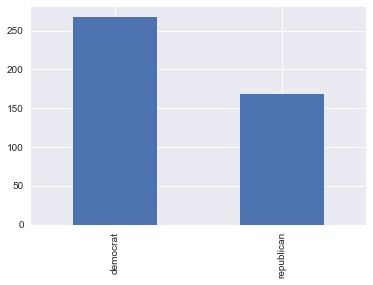

In [11]:
df.party.value_counts().plot(kind='bar');

In [12]:
def predict_dem(X):
    return ['democrat'] * len(X)

In [13]:
def predict_rep(X):
    return ['republican'] * len(X)

In [14]:
d = accuracy_score(y_test, predict_dem(X_test))
d

0.66055045871559637

In [15]:
r = accuracy_score(y_test, predict_rep(X_test))
r

0.33944954128440369

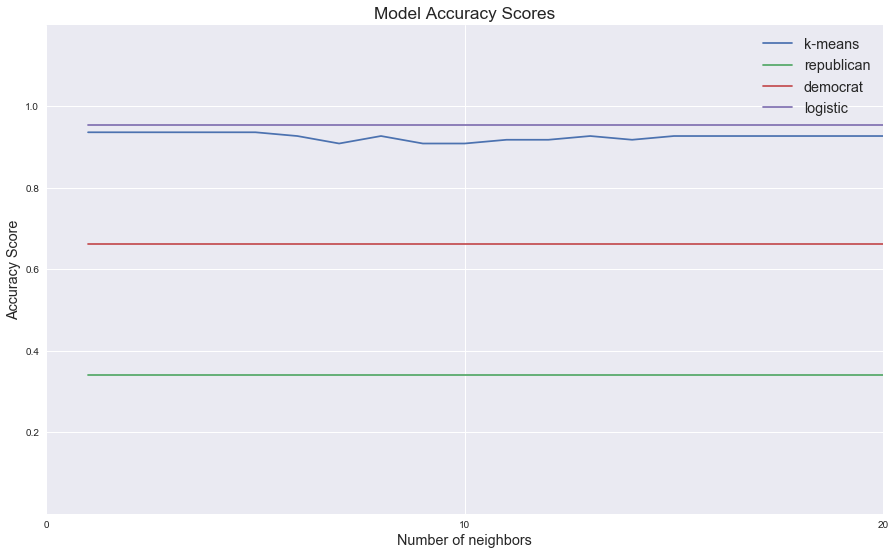

In [16]:
plt.figure(figsize=(15, 9))
plt.axis([0, 20, 0, 1.2])
plt.yticks([i*0.2 for i in range(1, 6)])
plt.xticks([0, 10, 20])
plt.xlabel('Number of neighbors', fontsize='x-large')
plt.ylabel('Accuracy Score', fontsize='x-large')
plt.plot(x, y, label = 'k-means')
plt.plot(x, [r]*len(x), label = 'republican')
plt.plot(x, [d]*len(x), label = 'democrat')
plt.plot(x, [l]*len(x), label = 'logistic' )
plt.title("Model Accuracy Scores", fontsize='xx-large')
plt.legend(fontsize='x-large', shadow=True);

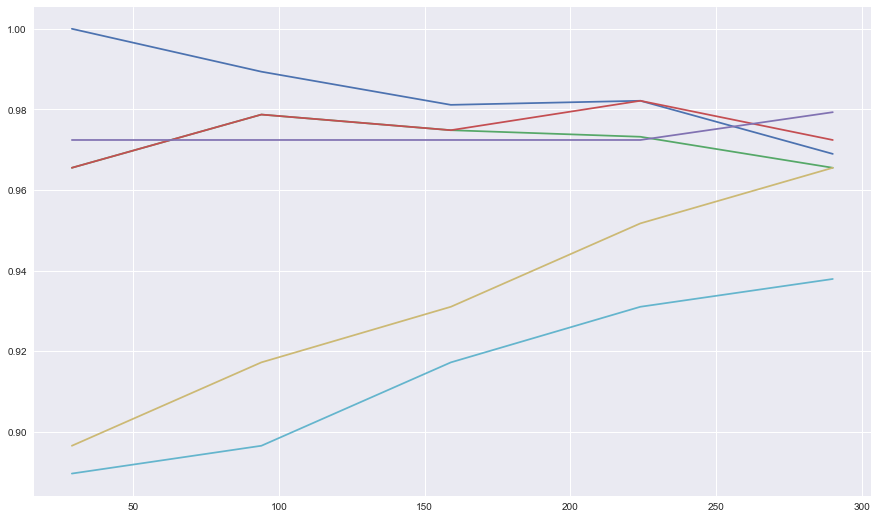

In [17]:
train_sizes, train_scores, valid_scores = learning_curve(log_reg, df[list(range(16))], df.party)
plt.figure(figsize=(15, 9))
plt.plot(train_sizes, train_scores)
plt.plot(train_sizes, valid_scores);

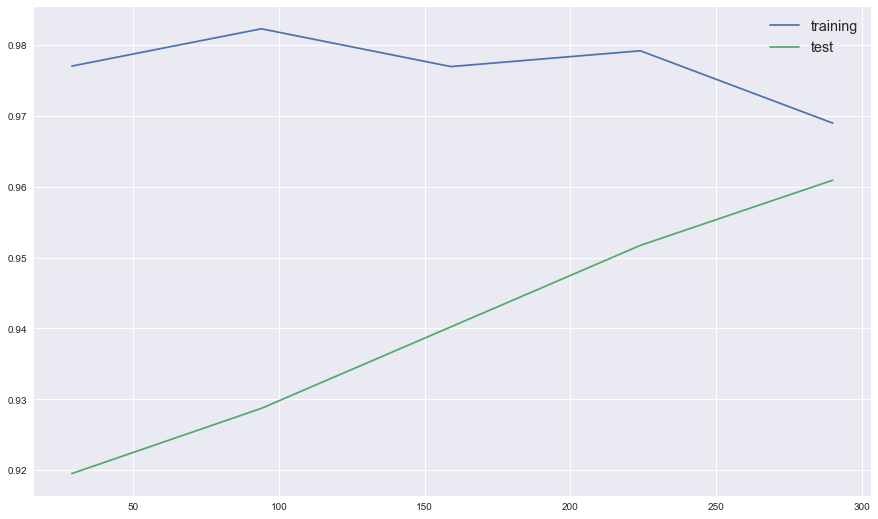

In [18]:
train_avg = np.mean(train_scores, axis=1)
valid_avg = np.mean(valid_scores, axis=1)
plt.figure(figsize=(15, 9))
plt.plot(train_sizes, train_avg, label='training')
plt.plot(train_sizes, valid_avg, label='test')
plt.legend(fontsize='x-large');

In [19]:
models = {}
models['GNB'] = GaussianNB()
models['SVC'] = SVC()
models['DTree'] = DecisionTreeClassifier()
models['RFor'] = RandomForestClassifier()

In [20]:
for name, model in models.items():
    model.fit(X_train, y_train)
    s = accuracy_score(y_test, model.predict(X_test))
    print("Name: %s, Score: %s" % (name, s))

Name: GNB, Score: 0.94495412844
Name: SVC, Score: 0.94495412844
Name: DTree, Score: 0.917431192661
Name: RFor, Score: 0.963302752294


In [21]:
models['LogReg'] = log_reg
for k in range(1, 21):
    models[str(k)+'_nbrs'] = KNeighborsClassifier(n_neighbors = k)
for name, model in models.items():
    s = np.mean(cross_val_score(model, df[list(range(16))], df.party))
    print('Model: %s \tCross-V Score: %s' % (name, s))

Model: GNB 	Cross-V Score: 0.931034482759
Model: SVC 	Cross-V Score: 0.954022988506
Model: DTree 	Cross-V Score: 0.954022988506
Model: RFor 	Cross-V Score: 0.951724137931
Model: LogReg 	Cross-V Score: 0.96091954023
Model: 1_nbrs 	Cross-V Score: 0.935632183908
Model: 2_nbrs 	Cross-V Score: 0.951724137931
Model: 3_nbrs 	Cross-V Score: 0.931034482759
Model: 4_nbrs 	Cross-V Score: 0.940229885057
Model: 5_nbrs 	Cross-V Score: 0.933333333333
Model: 6_nbrs 	Cross-V Score: 0.933333333333
Model: 7_nbrs 	Cross-V Score: 0.933333333333
Model: 8_nbrs 	Cross-V Score: 0.933333333333
Model: 9_nbrs 	Cross-V Score: 0.924137931034
Model: 10_nbrs 	Cross-V Score: 0.931034482759
Model: 11_nbrs 	Cross-V Score: 0.926436781609
Model: 12_nbrs 	Cross-V Score: 0.926436781609
Model: 13_nbrs 	Cross-V Score: 0.92183908046
Model: 14_nbrs 	Cross-V Score: 0.924137931034
Model: 15_nbrs 	Cross-V Score: 0.92183908046
Model: 16_nbrs 	Cross-V Score: 0.926436781609
Model: 17_nbrs 	Cross-V Score: 0.92183908046
Model: 18_nbrs 

In [22]:
!ls

Challenge 7.ipynb   house-votes-84.data


In [73]:
df = pd.read_csv('house-votes-84.data', names = list(range(16))+ ['party'])

In [74]:
votes_only = (df[list(range(16))]).copy()

In [75]:
votes_only.replace(to_replace={'n' : 0, 'y' : 1, '?' : np.nan}, inplace=True)


In [81]:
modes = [votes_only[i].mode() for i in range(16)]
for i in range(16):
    votes_only[i].fillna(int(votes_only[i].mode()), inplace=True)

In [87]:
X = votes_only[list(range(15))]
y = votes_only[15]
log_reg = LogisticRegression()
np.mean(cross_val_score(log_reg, X, y))

0.84822359558424754

In [88]:
!ls

2013_movies.csv            heavy_metal_parsed.pkl.zip
Challenge 7.ipynb          house-votes-84.data
data.txt                   ships.dta
haberman.data              titanic_train.csv


In [128]:
movies = pd.read_csv('2013_movies.csv', parse_dates=True, infer_datetime_format=True)
movies.dropna(inplace=True)
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [129]:
movies.columns

Index(['Title', 'Budget', 'DomesticTotalGross', 'Director', 'Rating',
       'Runtime', 'ReleaseDate'],
      dtype='object')

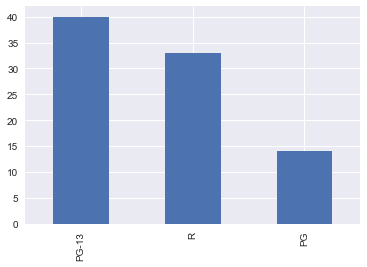

In [130]:
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movies.Rating
y.value_counts().plot(kind='bar');

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
logit = LogisticRegression()
logit.fit(X_train, y_train)
accuracy_score(y_test, logit.predict(X_test))

0.59090909090909094

In [173]:
coefs = pd.DataFrame([[logit.classes_[i]] + list(logit.coef_[i]) for i in range(3)], columns=['Class', 'Budget', 'DomesticTotalGross', 'Runtime']).set_index('Class')
coefs

,Budget,DomesticTotalGross,Runtime
Class,,,
PG,-7.564673e-09,-2.702937e-09,-1.711626e-13
PG-13,9.316166e-09,-4.442251e-09,-3.755940e-14
R,-2.154550e-08,3.775304e-09,1.112591e-13


In other words, Budget is a positive predictor for PG-13s, and Gross and Runtime are positive predictors for Rs

In [262]:
for k in range(1, 21):
    m = KNeighborsClassifier(n_neighbors=k)
    m.fit(X_train, y_train)
    s = accuracy_score(y_test, m.predict(X_test))
    print('KNN, k = %s: \tscore = %s' % (k, s))

KNN, k = 1: 	score = 0.701298701299
KNN, k = 2: 	score = 0.623376623377
KNN, k = 3: 	score = 0.727272727273
KNN, k = 4: 	score = 0.688311688312
KNN, k = 5: 	score = 0.779220779221
KNN, k = 6: 	score = 0.753246753247
KNN, k = 7: 	score = 0.805194805195
KNN, k = 8: 	score = 0.779220779221
KNN, k = 9: 	score = 0.818181818182
KNN, k = 10: 	score = 0.818181818182
KNN, k = 11: 	score = 0.818181818182
KNN, k = 12: 	score = 0.805194805195
KNN, k = 13: 	score = 0.805194805195
KNN, k = 14: 	score = 0.805194805195
KNN, k = 15: 	score = 0.792207792208
KNN, k = 16: 	score = 0.805194805195
KNN, k = 17: 	score = 0.779220779221
KNN, k = 18: 	score = 0.779220779221
KNN, k = 19: 	score = 0.779220779221
KNN, k = 20: 	score = 0.792207792208


In [174]:
five_nearest_nhbrs = KNeighborsClassifier(n_neighbors=5)
five_nearest_nhbrs.fit(X_train, y_train)

reconstruct = X_test.copy()
reconstruct['Rating'] = y_test
reconstruct['Predicted Rating'] = five_nearest_nhbrs.predict(X_test)
reconstruct.merge(movies)[['Title', 'Rating', 'Predicted Rating']].set_index('Title')

,Rating,Predicted Rating
Title,,
The Purge,R,R
Gangster Squad,R,PG-13
White House Down,PG-13,PG-13
Evil Dead,R,R
Fast & Furious 6,PG-13,PG-13
R.I.P.D.,PG-13,PG-13
The Call,R,R
A Good Day to Die Hard,R,PG
Riddick,R,R


In [175]:
#Accuracy of Guessing Mode (PG-13)
len(y_test[y_test == 'PG-13'])/len(y_test)

0.4090909090909091

In [176]:
!ls

2013_movies.csv            heavy_metal_parsed.pkl.zip
Challenge 7.ipynb          house-votes-84.data
data.txt                   ships.dta
haberman.data              titanic_train.csv


In [264]:
sur = pd.read_csv('haberman.data', names=['age', 'year', 'nodes', 'survived'])
sur.survived.replace(2, 0, inplace=True)
sur.head(10)

,age,year,nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


In [197]:
sur.age.mean(), sur.age.std()

(52.45751633986928, 10.80345234930328)

In [199]:
yes = sur[sur.survived == 1]
yes.age.mean(), yes.age.std()

(52.01777777777778, 11.012154179929546)

In [200]:
no = sur[sur.survived == 0]
no.age.mean(), no.age.std()

(53.67901234567901, 10.16713720829741)

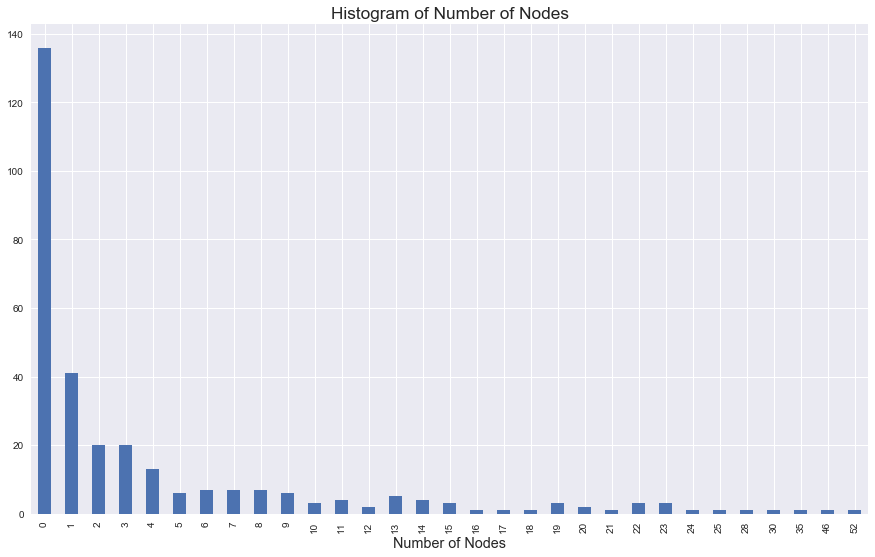

In [235]:
plt.figure(figsize=(15, 9))
plt.title('Histogram of Number of Nodes', fontsize='xx-large')
plt.xlabel('Number of Nodes', fontsize='x-large')
sur.nodes.value_counts().sort_index().plot(kind='bar');

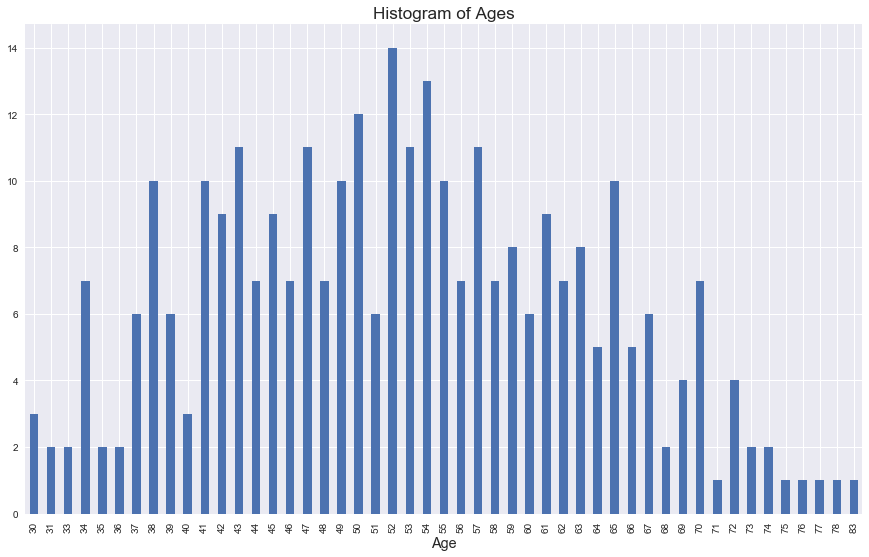

In [236]:
plt.figure(figsize=(15, 9))
plt.title('Histogram of Ages', fontsize='xx-large')
plt.xlabel('Age', fontsize='x-large')
sur.age.value_counts().sort_index().plot(kind='bar');

In [239]:
#earliest
'19' + str(sur.year.min())

'1958'

In [240]:
#recentmost
'19' + str(sur.year.max())

'1969'

In [243]:
X = sur[['age', 'year', 'nodes']]
y = sur.survived

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [245]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
accuracy_score(y_test, logit.predict(X_test))

0.81818181818181823

In [246]:
logit.coef_

array([[-0.01903367,  0.03229215, -0.09006454]])

Older patients are less likely to survive, as are patients with a larger number of nodes, with the latter effect being much stronger. Patients who were operated on later tended to do better as well, probably because treatment improved with time.

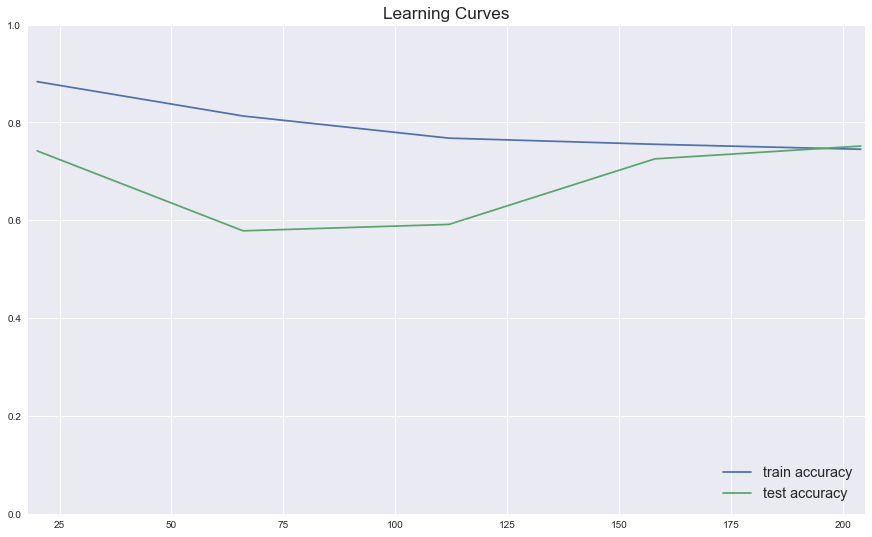

In [260]:
size, train_scores, valid_scores = learning_curve(logit, X, y)
train = np.mean(train_scores, axis=1)
test = np.mean(valid_scores, axis=1)
plt.figure(figsize=(15,9))
plt.axis([18, 205, 0 , 1])
plt.title('Learning Curves', fontsize='xx-large')
plt.plot(size, train, label='train accuracy')
plt.plot(size, test, label='test accuracy')
plt.legend(fontsize='x-large', loc=4);